# Combination of cilia classification and region mapper
The purpose of this notebook is to combine and visualise the distribution of the 3 types of cilia in the different regions of the portal vein niche.

In [1]:
from morphocilia.io import load_rescaled_channel
from morphocilia.classifier import scale_columns, classify_cilia
from morphocilia.segmenter import cilia_segmenter_cleaner
from morphocilia.quantifier import cilia_props_table
from morphocilia.region_mapper import get_regions
from pathlib import Path
from skimage.io import imread
from skimage.measure import regionprops_table

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
DATA_DIR = Path("../data")
TRAINING_DIR = DATA_DIR / "train"

filepaths = DATA_DIR / "20231025_p1_cd13_opn_arl13b.lif"
trainingpaths = (
    TRAINING_DIR / "cilia_for_training.tif",
    TRAINING_DIR / "regionmap.tif",
)

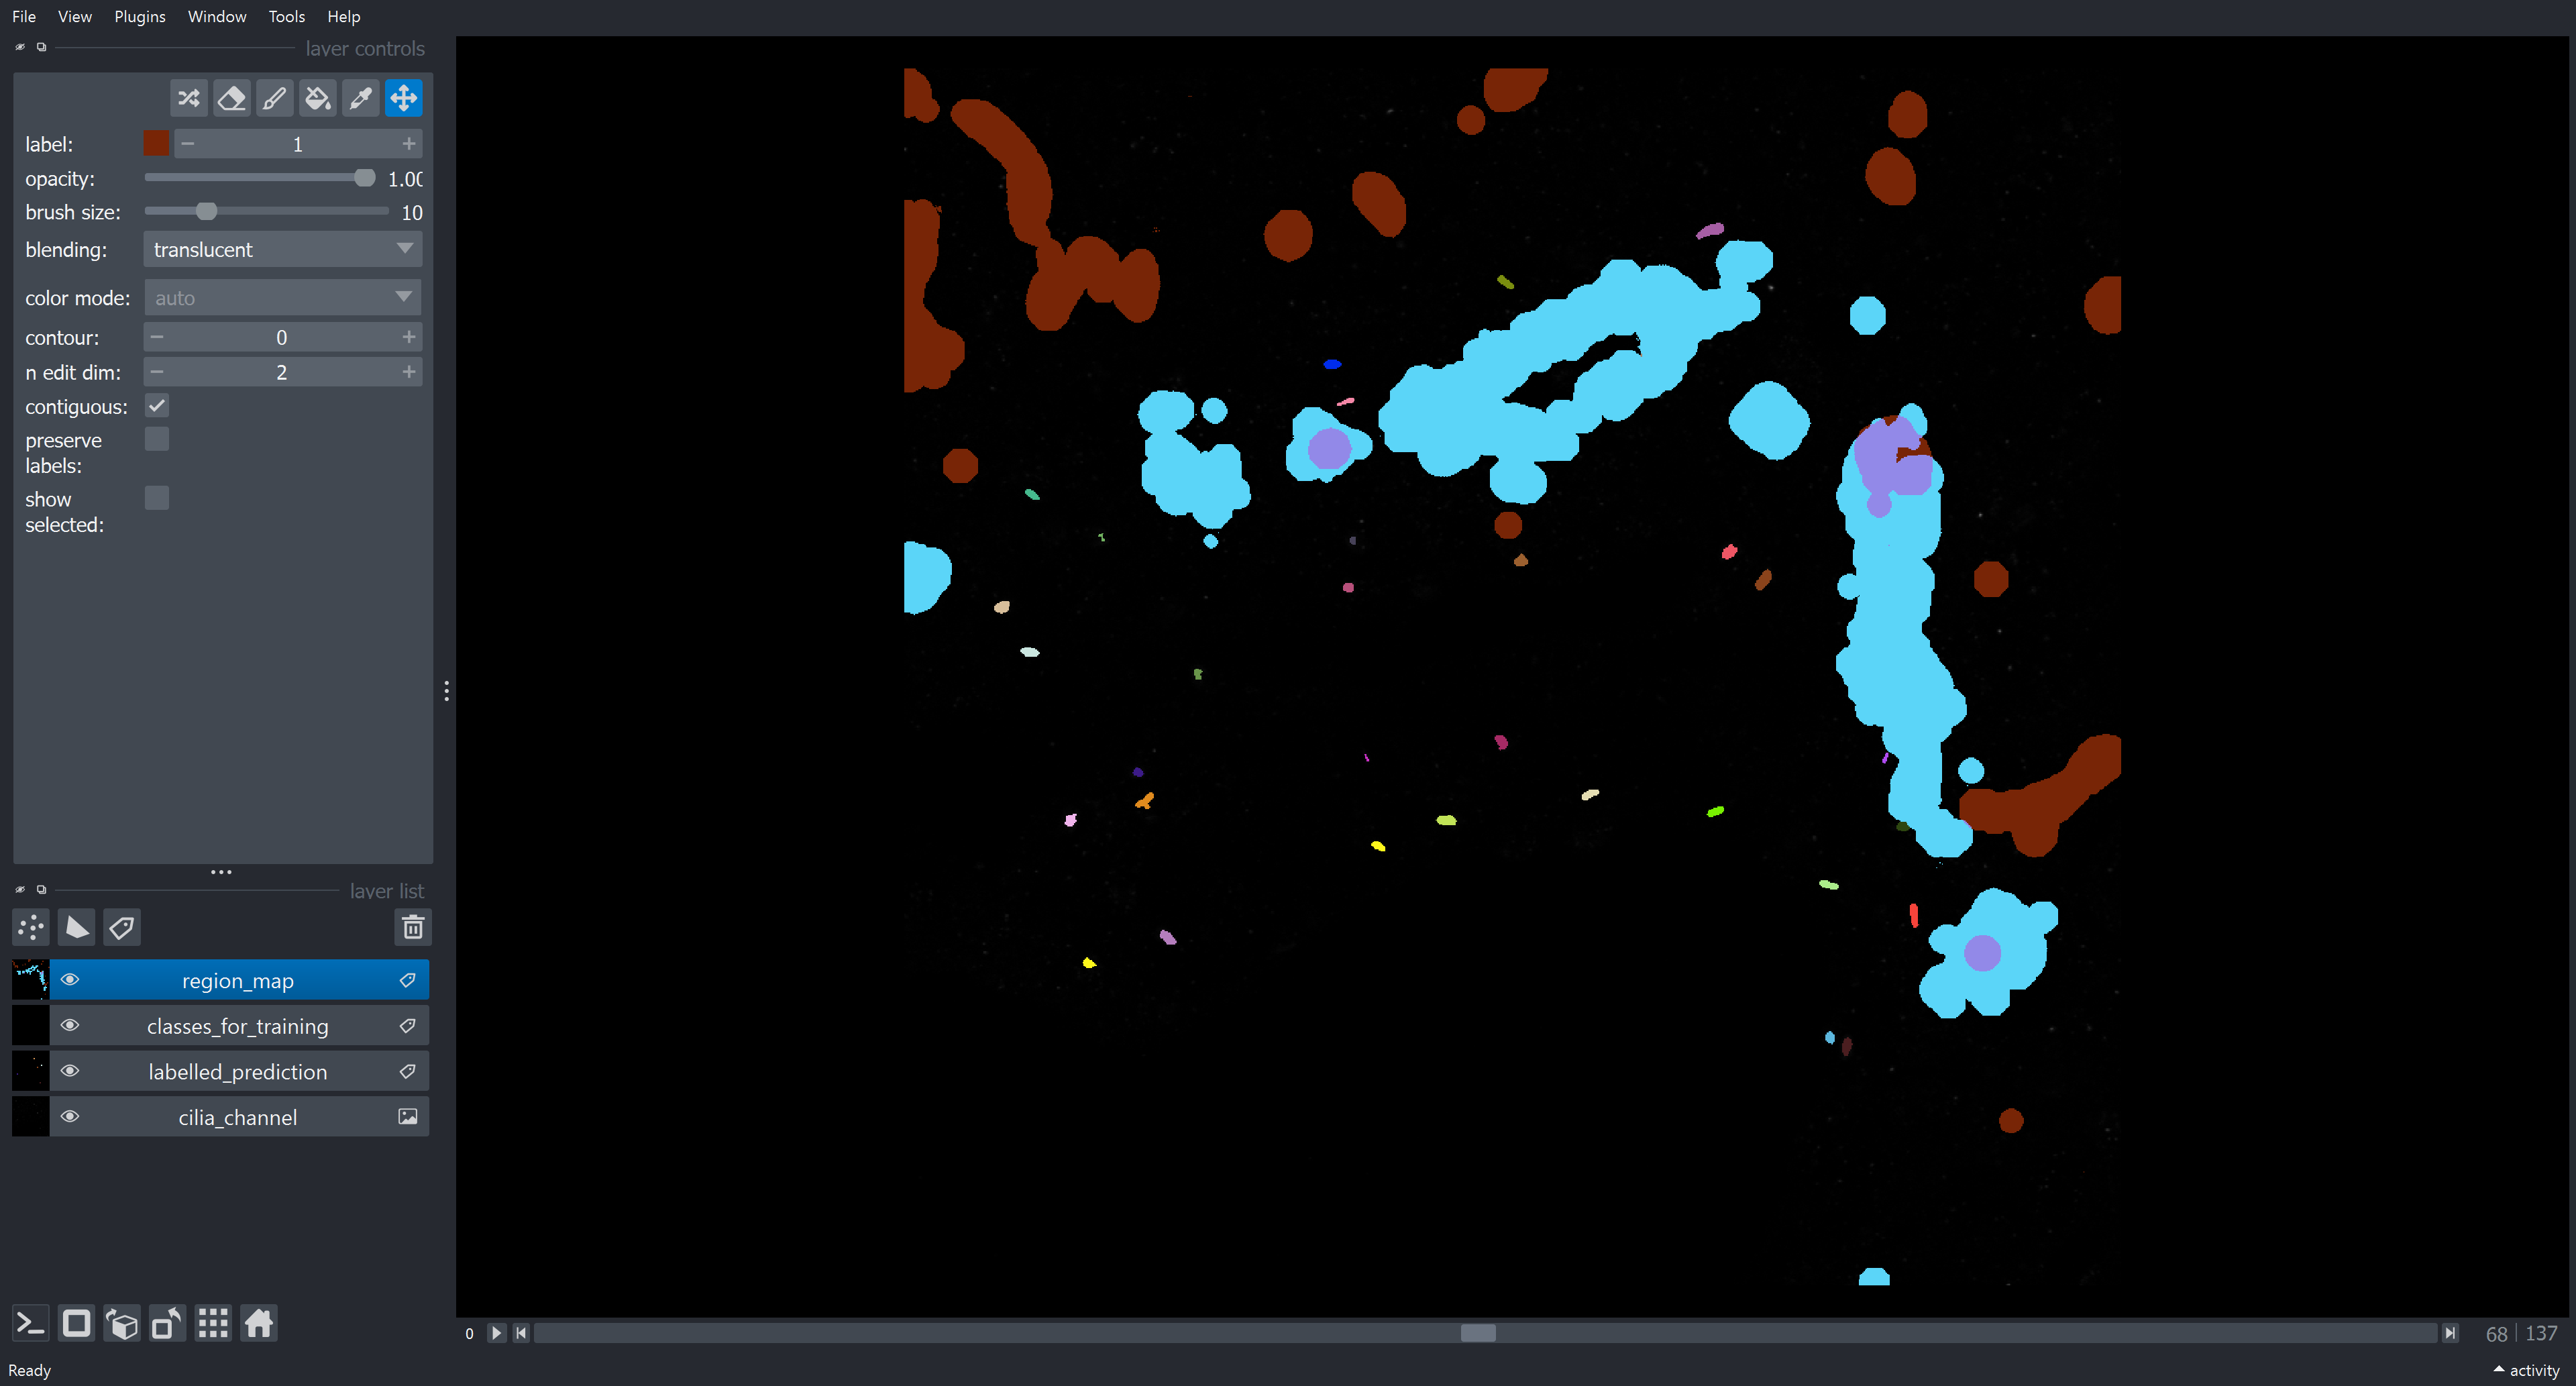

In [3]:
cilia_channel = load_rescaled_channel(filepaths, 5, 1)
labelled_prediction = cilia_segmenter_cleaner(cilia_channel)

classes_for_training = imread(trainingpaths[0])
region_map = imread(trainingpaths[1])

viewer = napari.Viewer()
viewer.add_image(cilia_channel)
viewer.add_labels(labelled_prediction, opacity=1)
viewer.add_labels(classes_for_training, opacity=1)
viewer.add_labels(region_map, opacity=1)
napari.utils.nbscreenshot(viewer)

In [4]:
df = cilia_props_table(labelled_prediction, cilia_channel)
df["image_name"] = filepaths.stem
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name
0,1,715.0,18.236501,8.504623,174.0,0.893750,20231025_p1_cd13_opn_arl13b
1,2,829.0,21.162737,7.970787,126.0,0.885684,20231025_p1_cd13_opn_arl13b
2,3,739.0,17.852597,8.071165,133.0,0.858304,20231025_p1_cd13_opn_arl13b
3,4,585.0,22.349080,6.895089,125.0,0.732165,20231025_p1_cd13_opn_arl13b
4,5,458.0,20.205238,4.148056,67.0,0.889320,20231025_p1_cd13_opn_arl13b
...,...,...,...,...,...,...,...
413,414,897.0,21.539102,8.124678,105.0,0.888119,20231025_p1_cd13_opn_arl13b
414,415,487.0,14.374873,7.878321,146.0,0.915414,20231025_p1_cd13_opn_arl13b
415,416,706.0,19.696338,7.839698,190.0,0.860976,20231025_p1_cd13_opn_arl13b
416,417,916.0,21.886831,8.752482,171.0,0.884170,20231025_p1_cd13_opn_arl13b


In [5]:
def parse_classes(class_number):
    if class_number == 1:
        return "elongated"
    elif class_number == 2:
        return "looped"
    elif class_number == 3:
        return "fibroblastic"
    elif class_number == 4:
        return "uncertain"
    elif class_number == 0:
        return "NA"
    else:
        raise ValueError

In [6]:
props = regionprops_table(
    labelled_prediction,
    classes_for_training,
    properties=["label", "intensity_max"],
)

df[["label", "classes"]] = pd.DataFrame(props).rename(
    columns={"intensity_max": "classes"}
)
df["classes"] = df["classes"].apply(parse_classes)
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name,classes
0,1,715.0,18.236501,8.504623,174.0,0.893750,20231025_p1_cd13_opn_arl13b,NA
1,2,829.0,21.162737,7.970787,126.0,0.885684,20231025_p1_cd13_opn_arl13b,NA
2,3,739.0,17.852597,8.071165,133.0,0.858304,20231025_p1_cd13_opn_arl13b,NA
3,4,585.0,22.349080,6.895089,125.0,0.732165,20231025_p1_cd13_opn_arl13b,NA
4,5,458.0,20.205238,4.148056,67.0,0.889320,20231025_p1_cd13_opn_arl13b,NA
...,...,...,...,...,...,...,...,...
413,414,897.0,21.539102,8.124678,105.0,0.888119,20231025_p1_cd13_opn_arl13b,NA
414,415,487.0,14.374873,7.878321,146.0,0.915414,20231025_p1_cd13_opn_arl13b,NA
415,416,706.0,19.696338,7.839698,190.0,0.860976,20231025_p1_cd13_opn_arl13b,NA
416,417,916.0,21.886831,8.752482,171.0,0.884170,20231025_p1_cd13_opn_arl13b,NA


In [7]:
df[["scaled_solidity", "scaled_axis_minor_length"]] = scale_columns(
    df[["solidity", "axis_minor_length"]]
)
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name,classes,scaled_solidity,scaled_axis_minor_length
0,1,715.0,18.236501,8.504623,174.0,0.893750,20231025_p1_cd13_opn_arl13b,NA,0.765247,-0.690678
1,2,829.0,21.162737,7.970787,126.0,0.885684,20231025_p1_cd13_opn_arl13b,NA,0.713095,-0.877551
2,3,739.0,17.852597,8.071165,133.0,0.858304,20231025_p1_cd13_opn_arl13b,NA,0.536073,-0.842413
3,4,585.0,22.349080,6.895089,125.0,0.732165,20231025_p1_cd13_opn_arl13b,NA,-0.279480,-1.254106
4,5,458.0,20.205238,4.148056,67.0,0.889320,20231025_p1_cd13_opn_arl13b,NA,0.736607,-2.215721
...,...,...,...,...,...,...,...,...,...,...
413,414,897.0,21.539102,8.124678,105.0,0.888119,20231025_p1_cd13_opn_arl13b,NA,0.728839,-0.823680
414,415,487.0,14.374873,7.878321,146.0,0.915414,20231025_p1_cd13_opn_arl13b,NA,0.905313,-0.909919
415,416,706.0,19.696338,7.839698,190.0,0.860976,20231025_p1_cd13_opn_arl13b,NA,0.553344,-0.923439
416,417,916.0,21.886831,8.752482,171.0,0.884170,20231025_p1_cd13_opn_arl13b,NA,0.703307,-0.603914


In [8]:
df["prediction"] = classify_cilia(
    df[["scaled_solidity", "scaled_axis_minor_length"]]
)
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name,classes,scaled_solidity,scaled_axis_minor_length,prediction
0,1,715.0,18.236501,8.504623,174.0,0.893750,20231025_p1_cd13_opn_arl13b,NA,0.765247,-0.690678,fibroblastic
1,2,829.0,21.162737,7.970787,126.0,0.885684,20231025_p1_cd13_opn_arl13b,NA,0.713095,-0.877551,fibroblastic
2,3,739.0,17.852597,8.071165,133.0,0.858304,20231025_p1_cd13_opn_arl13b,NA,0.536073,-0.842413,fibroblastic
3,4,585.0,22.349080,6.895089,125.0,0.732165,20231025_p1_cd13_opn_arl13b,NA,-0.279480,-1.254106,uncertain
4,5,458.0,20.205238,4.148056,67.0,0.889320,20231025_p1_cd13_opn_arl13b,NA,0.736607,-2.215721,fibroblastic
...,...,...,...,...,...,...,...,...,...,...,...
413,414,897.0,21.539102,8.124678,105.0,0.888119,20231025_p1_cd13_opn_arl13b,NA,0.728839,-0.823680,fibroblastic
414,415,487.0,14.374873,7.878321,146.0,0.915414,20231025_p1_cd13_opn_arl13b,NA,0.905313,-0.909919,fibroblastic
415,416,706.0,19.696338,7.839698,190.0,0.860976,20231025_p1_cd13_opn_arl13b,NA,0.553344,-0.923439,fibroblastic
416,417,916.0,21.886831,8.752482,171.0,0.884170,20231025_p1_cd13_opn_arl13b,NA,0.703307,-0.603914,fibroblastic


In [9]:
def get_color(kind):
    if kind == "elongated":
        return 1
    elif kind == "fibroblastic":
        return 2
    elif kind == "looped":
        return 3
    elif kind == "uncertain":
        return 4
    else:
        return 5

In [10]:
df["prediction_int"] = df.prediction.apply(get_color)
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name,classes,scaled_solidity,scaled_axis_minor_length,prediction,prediction_int
0,1,715.0,18.236501,8.504623,174.0,0.893750,20231025_p1_cd13_opn_arl13b,NA,0.765247,-0.690678,fibroblastic,2
1,2,829.0,21.162737,7.970787,126.0,0.885684,20231025_p1_cd13_opn_arl13b,NA,0.713095,-0.877551,fibroblastic,2
2,3,739.0,17.852597,8.071165,133.0,0.858304,20231025_p1_cd13_opn_arl13b,NA,0.536073,-0.842413,fibroblastic,2
3,4,585.0,22.349080,6.895089,125.0,0.732165,20231025_p1_cd13_opn_arl13b,NA,-0.279480,-1.254106,uncertain,4
4,5,458.0,20.205238,4.148056,67.0,0.889320,20231025_p1_cd13_opn_arl13b,NA,0.736607,-2.215721,fibroblastic,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,897.0,21.539102,8.124678,105.0,0.888119,20231025_p1_cd13_opn_arl13b,NA,0.728839,-0.823680,fibroblastic,2
414,415,487.0,14.374873,7.878321,146.0,0.915414,20231025_p1_cd13_opn_arl13b,NA,0.905313,-0.909919,fibroblastic,2
415,416,706.0,19.696338,7.839698,190.0,0.860976,20231025_p1_cd13_opn_arl13b,NA,0.553344,-0.923439,fibroblastic,2
416,417,916.0,21.886831,8.752482,171.0,0.884170,20231025_p1_cd13_opn_arl13b,NA,0.703307,-0.603914,fibroblastic,2


In [13]:
df[["region", "all_regions"]] = get_regions(labelled_prediction, region_map)[
    ["region", "all_regions"]
]
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name,classes,scaled_solidity,scaled_axis_minor_length,prediction,prediction_int,region,all_regions
0,1,715.0,18.236501,8.504623,174.0,0.893750,20231025_p1_cd13_opn_arl13b,NA,0.765247,-0.690678,fibroblastic,2,NA,{0}
1,2,829.0,21.162737,7.970787,126.0,0.885684,20231025_p1_cd13_opn_arl13b,NA,0.713095,-0.877551,fibroblastic,2,NA,{0}
2,3,739.0,17.852597,8.071165,133.0,0.858304,20231025_p1_cd13_opn_arl13b,NA,0.536073,-0.842413,fibroblastic,2,NA,{0}
3,4,585.0,22.349080,6.895089,125.0,0.732165,20231025_p1_cd13_opn_arl13b,NA,-0.279480,-1.254106,uncertain,4,NA,{0}
4,5,458.0,20.205238,4.148056,67.0,0.889320,20231025_p1_cd13_opn_arl13b,NA,0.736607,-2.215721,fibroblastic,2,NA,{0}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,897.0,21.539102,8.124678,105.0,0.888119,20231025_p1_cd13_opn_arl13b,NA,0.728839,-0.823680,fibroblastic,2,NA,{0}
414,415,487.0,14.374873,7.878321,146.0,0.915414,20231025_p1_cd13_opn_arl13b,NA,0.905313,-0.909919,fibroblastic,2,NA,{0}
415,416,706.0,19.696338,7.839698,190.0,0.860976,20231025_p1_cd13_opn_arl13b,NA,0.553344,-0.923439,fibroblastic,2,NA,{0}
416,417,916.0,21.886831,8.752482,171.0,0.884170,20231025_p1_cd13_opn_arl13b,NA,0.703307,-0.603914,fibroblastic,2,NA,{0}


In [17]:
df.query("prediction == 'elongated'")

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,image_name,classes,scaled_solidity,scaled_axis_minor_length,prediction,prediction_int,region,all_regions
28,29,1719.0,50.688493,8.509117,110.0,0.431043,20231025_p1_cd13_opn_arl13b,NA,-2.226387,-0.689105,elongated,1,both,"{2, 3}"
34,35,39741.0,429.604158,25.141472,115.0,0.051964,20231025_p1_cd13_opn_arl13b,looped,-4.677322,5.133151,elongated,1,both,"{1, 2, 3}"
52,53,5877.0,68.254776,17.164132,182.0,0.406882,20231025_p1_cd13_opn_arl13b,NA,-2.382602,2.340635,elongated,1,both,"{2, 3}"
65,66,11174.0,155.505021,13.446942,127.0,0.366613,20231025_p1_cd13_opn_arl13b,NA,-2.642959,1.039410,elongated,1,both,"{1, 2, 3}"
91,92,3231.0,75.055065,12.106636,163.0,0.324300,20231025_p1_cd13_opn_arl13b,NA,-2.916535,0.570228,elongated,1,both,"{1, 2, 3}"
140,141,21870.0,247.015088,22.808194,186.0,0.082767,20231025_p1_cd13_opn_arl13b,NA,-4.478170,4.316373,elongated,1,both,"{2, 3}"
175,176,3345.0,102.520753,12.025267,94.0,0.272106,20231025_p1_cd13_opn_arl13b,NA,-3.253995,0.541744,elongated,1,both,"{2, 3}"
189,190,9629.0,178.361418,16.941666,111.0,0.177572,20231025_p1_cd13_opn_arl13b,NA,-3.865208,2.262759,elongated,1,both,"{1, 2, 3}"
193,194,1272.0,32.975569,7.446679,57.0,0.450425,20231025_p1_cd13_opn_arl13b,NA,-2.101073,-1.061018,elongated,1,both,"{2, 3}"
281,282,3762.0,100.756000,9.910622,66.0,0.417351,20231025_p1_cd13_opn_arl13b,NA,-2.314914,-0.198500,elongated,1,both,{3}


Now all cilia from this image are assigned to their corresponding region(s). Let's apply this to all images in the dataset.